In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
train = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [51]:
BATCH_SIZE = 1
train_dataset = train.flow_from_directory('train/', target_size=(200,200), batch_size=BATCH_SIZE, class_mode='categorical')
test_dataset = test.flow_from_directory('test/', target_size=(200,200), batch_size=BATCH_SIZE, class_mode='categorical')

Found 91 images belonging to 3 classes.
Found 39 images belonging to 3 classes.


In [52]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Add dropout layer
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Add dropout layer
    tf.keras.layers.Dense(3, activation='softmax')
])

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 99, 99, 16)        0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 99, 99, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 48, 48, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 48, 48, 32)       

In [54]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
EPOCH = 10
model_fit = model.fit(train_dataset, epochs=EPOCH, validation_data=test_dataset) 

Epoch 1/10
91/91 [==============================] - 49s 508ms/step - loss: 1.3519 - accuracy: 0.3626 - val_loss: 1.0986 - val_accuracy: 0.3333
Epoch 2/10
91/91 [==============================] - 44s 482ms/step - loss: 1.0335 - accuracy: 0.4286 - val_loss: 0.8061 - val_accuracy: 0.6667
Epoch 3/10
91/91 [==============================] - 43s 474ms/step - loss: 1.2697 - accuracy: 0.5165 - val_loss: 0.7641 - val_accuracy: 0.6667
Epoch 4/10
91/91 [==============================] - 43s 476ms/step - loss: 0.7868 - accuracy: 0.5824 - val_loss: 0.6856 - val_accuracy: 0.6667
Epoch 5/10
91/91 [==============================] - 43s 469ms/step - loss: 0.5710 - accuracy: 0.7033 - val_loss: 0.3286 - val_accuracy: 0.6667
Epoch 6/10
91/91 [==============================] - 46s 508ms/step - loss: 0.3069 - accuracy: 0.9231 - val_loss: 0.2344 - val_accuracy: 1.0000
Epoch 7/10
91/91 [==============================] - 38s 421ms/step - loss: 0.5274 - accuracy: 0.8681 - val_loss: 0.4465 - val_accuracy: 1.0000

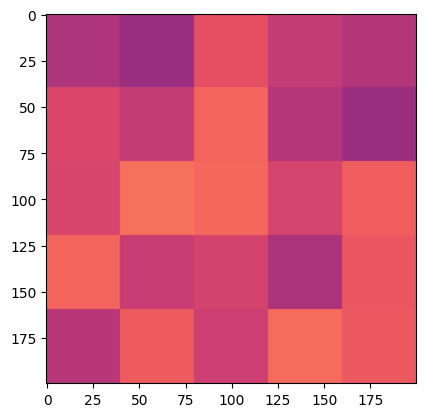

1/1 [==============================] - 0s 70ms/step
[[1. 0. 0.]]


In [59]:
image = tf.keras.preprocessing.image
dir_val = 'val'
model_input_shape = (200, 200)

# List all files in the 'val' directory
val_files = os.listdir(dir_val)

# Pick a random image file from the list
random_image_filename = random.choice(val_files)

# Load and resize the randomly selected image
img_path = os.path.join(dir_val, random_image_filename)
img = image.load_img(img_path, target_size=model_input_shape)
plt.imshow(img)
plt.show()

# Convert the image to a numpy array
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)

# Make predictions
val = model.predict(X)

print(val)

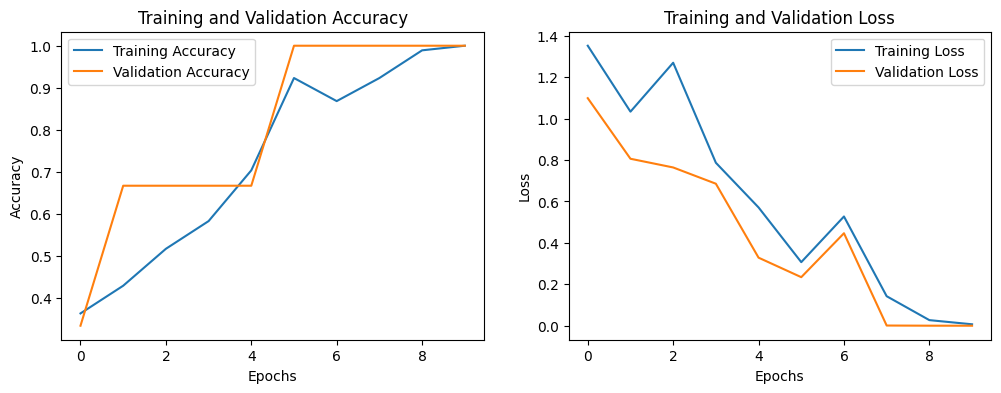

In [60]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model_fit.history['accuracy'], label='Training Accuracy')
plt.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(model_fit.history['loss'], label='Training Loss')
plt.plot(model_fit.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [67]:
# Make predictions on the training dataset
Y_pred = model.predict(train_dataset)
y_pred = np.argmax(Y_pred, axis=1)

# Get actual labels in array form
actual_labels = np.array(train_dataset.classes)

# Print classification report
print("Classification Report:")
print(classification_report(actual_labels, y_pred))

# Now you have actual_labels and y_pred as arrays
print("Actual Labels Array:", actual_labels)
print("Predicted Labels Array:", y_pred)

91/91 [==============================] - 3s 36ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.40      0.40        30
           1       0.33      0.33      0.33        30
           2       0.39      0.39      0.39        31

    accuracy                           0.37        91
   macro avg       0.37      0.37      0.37        91
weighted avg       0.37      0.37      0.37        91

Actual Labels Array: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Predicted Labels Array: [2 1 0 1 2 0 1 2 2 0 1 2 2 0 1 1 0 2 1 0 1 2 0 1 0 0 0 0 2 0 1 0 0 2 1 1 1
 2 2 2 0 0 0 1 2 0 1 1 2 2 0 1 1 0 1 0 2 2 0 2 0 1 0 2 1 2 0 2 2 0 2 2 1 2
 2 0 1 0 0 2 2 2 2 1 0 1 1 1 1 1 1]
